### Prediction using Supervised ML

### Multiple Regression

> The term regression is used when you try to find the relationship between variables.

> In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

> Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

`Project Objective`


* Predict the Profit based on the independent variables. So Profit is the dependent variable and the other 4 are independent variables.

### 1. Importing the required Libraries.

In [1]:
import pandas as pd #Pandas allows you to do various data manipulations.
import numpy as np  #Numpy allows you to perform various number of mathematical operations.
import matplotlib.pyplot as plt #Matplotlib allows you to create graphical user interfaces to visualize data. 
%matplotlib inline

### 2. Importing Data from the Dataset.

In [2]:
data = pd.read_csv("50_Startups.csv") #Reading CSV file from the above link.
print("------------Data imported successfully---------------\n")
data.info()
data.head(10)#df.head() allows you to print 10 rows in your dataset.

------------Data imported successfully---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### 3. Visualizing the dataset graphically by ploting our data points on 2D graph.

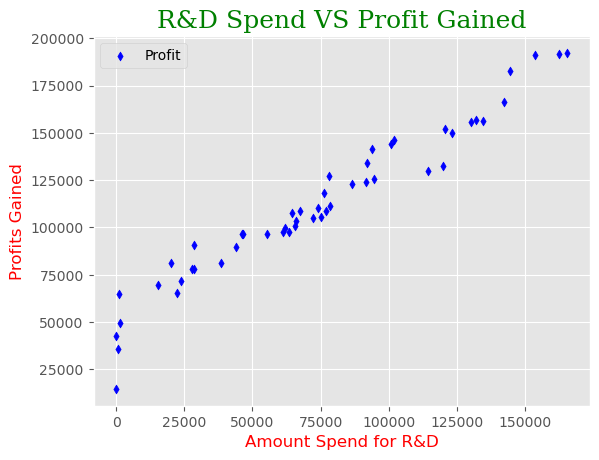

In [31]:
data.plot.scatter(x='R&D Spend', y='Profit',label='Profit', marker='d',color='blue')
plt.style.use('ggplot')
plt.title('R&D Spend VS Profit Gained',fontsize=18,color='green',fontname='serif')  
plt.xlabel('Amount Spend for R&D',color='red')  
plt.ylabel('Profits Gained',color='red')  
plt.show()

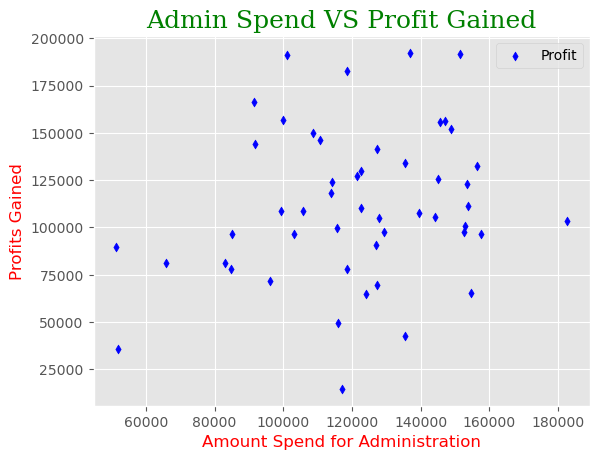

In [30]:
data.plot.scatter(x='Administration', y='Profit',label='Profit', marker='d',color='blue')
plt.style.use('ggplot')
plt.title('Admin Spend VS Profit Gained',fontsize=18,color='green',fontname='serif')  
plt.xlabel('Amount Spend for Administration',color='red')  
plt.ylabel('Profits Gained',color='red')  
plt.show()

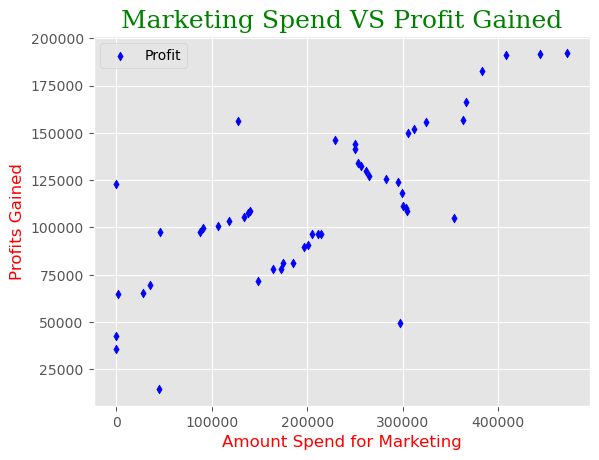

In [29]:
data.plot.scatter(x='Marketing Spend', y='Profit',label='Profit', marker='d',color='blue')
plt.style.use('ggplot')
plt.title('Marketing Spend VS Profit Gained',fontsize=18,color='green',fontname='serif')  
plt.xlabel('Amount Spend for Marketing',color='red')  
plt.ylabel('Profits Gained',color='red')  
plt.show()

> From the above graph i note that, we used all the independent variables but its possible that some independent variables are more significant than others and have a greater impact on the profit and some are not significant meaning if we remove them from the model - we may get better predictions.

### 4. Preparing the Data

* Here x is contains all the independent variable which are "R&D Spend", "Administration", "Marketing Spend" and "State" and y is the dependent variable which is the "Profit"

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,4].values

> Convert text variable("State Column")  to numbers

In [7]:
# We use LabelEncoder class to convert text to numbers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_x = LabelEncoder()
x[:,3] = labelEncoder_x.fit_transform(x[:,3])

display(data.head(10))

df = pd.DataFrame({'R&D Spend': list(x[:,0]), 'Administration': list(x[:,1]), 'Marketing': list(x[:,2]), 'State': list(x[:,3])})
display(df.head(10))


# see that all States have been converted to numbers. Here New York has been converted to 2, California to 0 and Florida to 1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


,R&D Spend,Administration,Marketing,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [8]:
'''Now we should not do any operations on above data, 
Because New York has been assigned a value 2 and California has been assigned 0. 
So the model might assume New York is higher than California which is not right.'''

# So to avoid this we have to introduce dummy variables using OneHotEncoder as shown below
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

# remove one of the dummy variables.
x = x[:,1:]

In [9]:
# plit Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### 5. Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

### 6. Making Predictions

In [23]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Input [X_test]': list(X_test), 'Output [y_pred]': np.round(y_pred)})
display(df)

,Input [X_test],Output [y_pred]
0,"[1.0, 0.0, 66051.52, 182645.56, 118148.2]",103015.0
1,"[0.0, 0.0, 100671.96, 91790.61, 249744.55]",132582.0
2,"[1.0, 0.0, 101913.08, 110594.11, 229160.95]",132448.0
3,"[1.0, 0.0, 27892.92, 84710.77, 164470.71]",71976.0
4,"[1.0, 0.0, 153441.51, 101145.55, 407934.54]",178537.0
5,"[0.0, 1.0, 72107.6, 127864.55, 353183.81]",116161.0
6,"[0.0, 1.0, 20229.59, 65947.93, 185265.1]",67852.0
7,"[0.0, 1.0, 61136.38, 152701.92, 88218.23]",98792.0
8,"[1.0, 0.0, 73994.56, 122782.75, 303319.26]",113969.0
9,"[1.0, 0.0, 142107.34, 91391.77, 366168.42]",167921.0


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual_Profit': Y_test, 'Predicted_Profit': np.round(y_pred)}) #Comparing the accurracy  
display(df)

,Actual_Profit,Predicted_Profit
0,103282.38,103015.0
1,144259.40,132582.0
2,146121.95,132448.0
3,77798.83,71976.0
4,191050.39,178537.0
5,105008.31,116161.0
6,81229.06,67852.0
7,97483.56,98792.0
8,110352.25,113969.0
9,166187.94,167921.0


### Evaluating the model

In [24]:
from sklearn.metrics import r2_score
# r2 score for perfect model is 1.0
print("Models r2 score: ",r2_score(Y_test,y_pred))

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Models r2 score:  0.9347068473282446
Mean Absolute Error: 7514.293659640891


In [ ]:
# Here If we take the first startup - 
# the actual profit is 103282 and our model predicted 103015 - which is almost perfect. 
# There are some predictions that are off like the second startup -  the actual profit is 144259 and our model predicted 132582.

In [ ]:
# In the model that we just built, we used all the independent variables but its possible that some independent variables 
# are more significant than others and have a greater impact on the profit and some are not significant meaning 
# if we remove them from the model - we may get better predictions.



# from the above graphs i have determined the if i would have taken only R&D spen


# from the above graphs i have determined the if i would have taken only R&D spend. 
# That is only 1 independent variable which will give better predictions.

# So we should build our model using 1 independent variable which is the R&D spent and 
# do the prediction and our results will be better than the first time.